In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
ticker = 'AAPL'
df = yf.download(ticker, start='2015-01-01', end='2024-12-31')
df = df[['Close']]


/tmp/ipython-input-5-3192137484.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)


In [ ]:
training_data_len = int(len(scaled_data) * 0.8)

In [ ]:

train_data = scaled_data[0:training_data_len]
x_train, y_train = [], []

In [ ]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])


In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0170
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.9666e-04
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 2.7376e-04
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.9808e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 2.8110e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.4183e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 2.5456e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.5316e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 2.3994e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.1094e-04


In [ ]:
test_data = scaled_data[training_data_len - 60:]
x_test, y_test = [], df[training_data_len:].values


In [ ]:
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 6.32


In [ ]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

/tmp/ipython-input-19-3983594056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


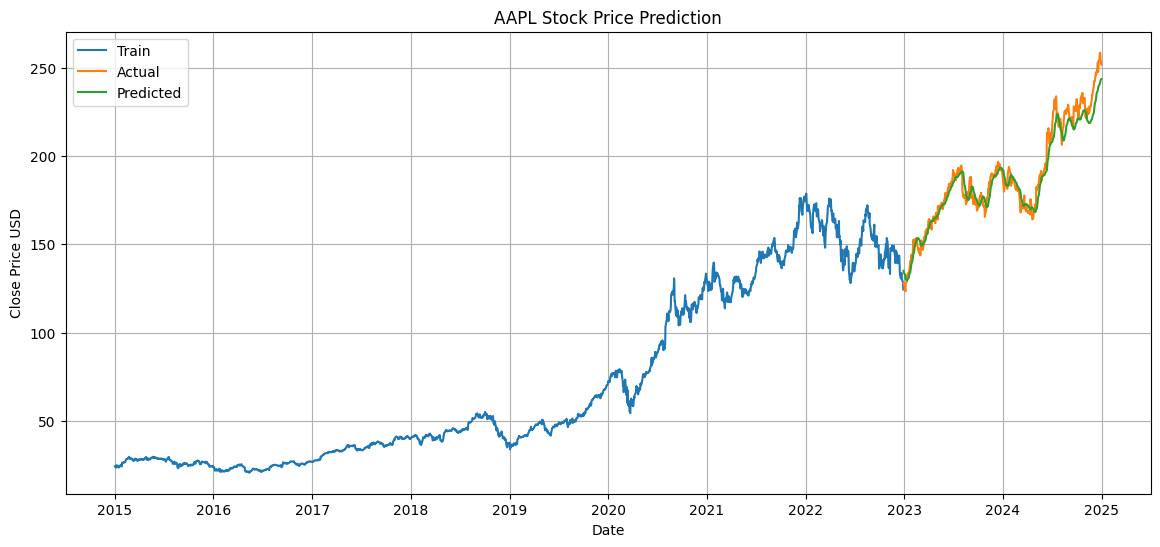

In [ ]:
plt.figure(figsize=(14, 6))
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'])
plt.grid(True)
plt.show()
